In [1]:
import numpy as np
import pandas as pd

import os

import matplotlib.pyplot as plt
%matplotlib inline
import plotnine as p9

#데이터 불러오기
path = 'C:/Users/changhyun/Desktop/temporary/'
file_list = os.listdir(path)
file_list_py = [file for file in file_list if file.endswith('.xlsx')]

df = pd.DataFrame()
for i in file_list_py:
    data = pd.read_excel(path + i)
    df = pd.concat([df,data])
    
df = df.reset_index(drop = True) 

#데이터갯수확인  
print(df.shape)

(43783495, 12)


In [2]:
#2004년 예외처리
path = 'C:/Users/changhyun/Desktop/exceptional/'
file_list = os.listdir(path)
file_list_py = [file for file in file_list if file.endswith('.xlsx')]

exc = pd.DataFrame()
for i in file_list_py:
    data = pd.read_excel(path + i)
    dates = data['측정일시'].str.replace('-','')
    data['측정일시'] = dates
    df = pd.concat([df,data])

print(df)

            지역 측정소명   측정소코드         측정일시    SO2   CO     O3    NO2   PM10  \
0           서울   중구  111121   2001010101  0.010  0.8  0.012  0.047 -999.0   
1           서울   중구  111121   2001010102  0.010  0.7  0.027  0.040 -999.0   
2           서울   중구  111121   2001010103  0.013  0.9  0.015  0.038 -999.0   
3           서울   중구  111121   2001010104  0.014  0.9  0.020  0.036 -999.0   
4           서울   중구  111121   2001010105  0.012  0.7  0.032  0.029 -999.0   
...        ...  ...     ...          ...    ...  ...    ...    ...    ...   
470251  인천 강화군  석모리  831481  20041231 20  0.004  0.7  0.035  0.003   50.0   
470252  인천 강화군  석모리  831481  20041231 21  0.004  0.7  0.035  0.003   53.0   
470253  인천 강화군  석모리  831481  20041231 22  0.004  0.7  0.036  0.003   40.0   
470254  인천 강화군  석모리  831481  20041231 23  0.004  0.7  0.036  0.003   30.0   
470255  인천 강화군  석모리  831481  20041231 24  0.004  0.7  0.035  0.004   41.0   

                    주소    망  PM25  
0           서울 중구 서소문동  NaN   NaN  
1  

In [3]:
print(df.columns)

Index(['지역', '측정소명', '측정소코드', '측정일시', 'SO2', 'CO', 'O3', 'NO2', 'PM10', '주소',
       '망', 'PM25'],
      dtype='object')


In [4]:
#지역 column 전처리
local = df['지역'].str.split(' ')
df['City'] = local.str.get(0)

def convertcity(df):
    if df == '서울':
        return 'Seoul'
    elif df == '경기':
        return 'Gyeongi'
    elif df == '인천':
        return 'Incheon'
    elif df == '부산':
        return 'Busan'            
    elif df == '대구':
        return 'Daegu'
    elif df == '광주':
        return 'Gwangju'
    elif df == '울산':
        return 'Ulsan'
    elif df == '대전':
        return 'Daejeon'
    elif df == '경남':
        return 'Gyeongsang'
    elif df == '경북':
        return 'Gyeongsang'                
    elif df == '전남':
        return 'Jeonra'
    elif df == '전북':
        return 'Jeonra'
    elif df == '강원':
        return 'Gangwon'
    elif df == '제주':
        return 'Jeju'
    elif df == '충북':
        return 'Choongchung'
    elif df == '충남':
        return 'Choongchung'
    elif df == '세종':
        return 'Sejong'
    
df['City'] = df['City'].apply(convertcity)

In [5]:
#측정일시 column 전처리
df['측정일시'] = df['측정일시'].astype(str)

def sliceyear(df):
    return df[:4]

def slicemonth(df):
    return df[4:6]

df['Year'] = df['측정일시'].apply(sliceyear)
df['Month'] = df['측정일시'].apply(slicemonth)
df['Month'] = df['Month'].astype(int)
df['Year'] = df['Year'].astype(int)

In [6]:
#필요없는 column drop 및 결측치 처리
df = df.drop(['측정소명','측정소코드','SO2','O3','NO2','PM10','주소','측정일시'],axis=1)
if 'PM25' in df.columns:
    df = df.drop(['망','PM25'],axis=1)
    
df['CO'] = df['CO'].replace(-999,np.NaN)
df['CO'] = df['CO'].fillna(df['CO'].mean())

In [9]:
#연도별 평균
groupmean = df.groupby(['City','Month'],as_index = False).mean()

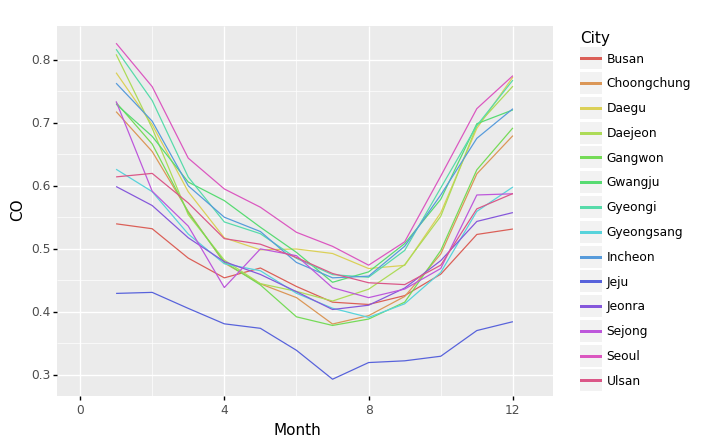

<ggplot: (-9223371922682612396)>

In [39]:
#그래프 그리기
p9.ggplot(data=groupmean, mapping=p9.aes(x='Month',y='CO')) + p9.geom_line(mapping=p9.aes(colour = 'City')) + p9.scale_x_continuous(limits = (0,12.5))